In [14]:
import pandas as pd

df = pd.read_csv("../../datasets/pima_indian_diabetes_dataset/cleaned_dataset.csv")
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,2,108,62,32,56,25.2,0.128,21,0
1,0,137,68,14,148,24.8,0.143,21,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,139,62,17,210,22.1,0.207,21,0
4,4,99,76,15,51,23.2,0.223,21,0


In [15]:
stats_by_class = df.groupby('Outcome').agg(['mean', 'std'])
display(stats_by_class)


Pregnancies               Glucose            Blood Pressure  \
               mean       std        mean        std           mean   
Outcome                                                               
0          2.721374  2.617844  111.431298  24.642133      68.969466   
1          4.469231  3.916153  145.192308  29.839388      74.076923   

                   Skin Thickness                Insulin              \
               std           mean        std        mean         std   
Outcome                                                                
0        11.892841      27.251908  10.434135  130.854962  102.626177   
1        13.021518      32.961538   9.642770  206.846154  132.699898   

               BMI           Diabetes Pedigree Function                 Age  \
              mean       std                       mean      std       mean   
Outcome                                                                       
0        31.750763  6.794971                   0.472168  0.29924  28.347328   
1        35.777692  6.734687                   0.625585  0.40591  35.938462   

                    
               std  
Outcome             
0         8.989008  
1        10.634705

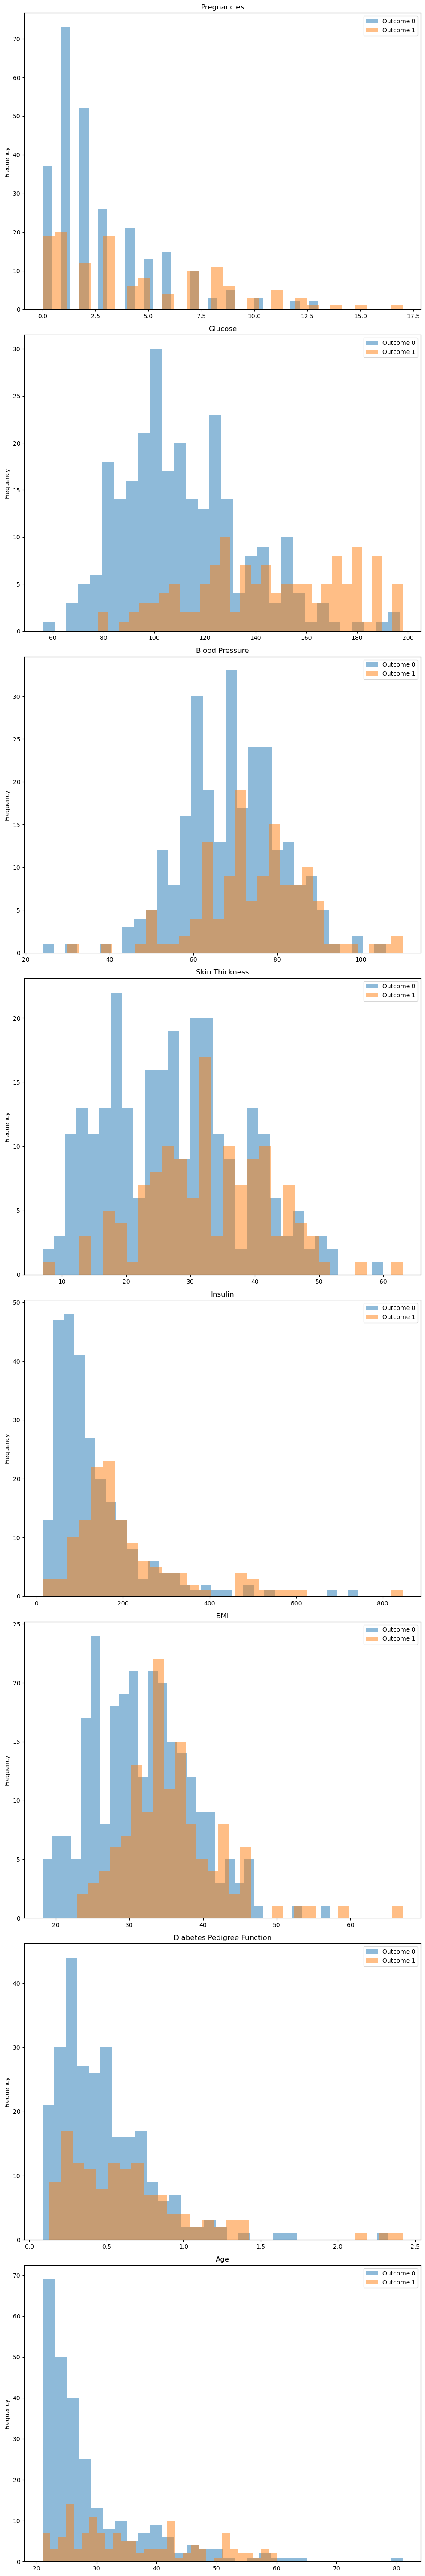

In [16]:
import matplotlib.pyplot as plt

features = df.columns.drop('Outcome')
outcomes = df['Outcome'].unique()

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 60))
axes = axes.flatten()

for idx, feature in enumerate(features):
    for outcome in outcomes:
        df[df['Outcome'] == outcome][feature].plot(
            kind='hist', 
            bins=30, 
            alpha=0.5, 
            ax=axes[idx], 
            label=f'Outcome {outcome}'
        )
    axes[idx].set_title(feature)
    axes[idx].legend()

plt.tight_layout()
plt.show()

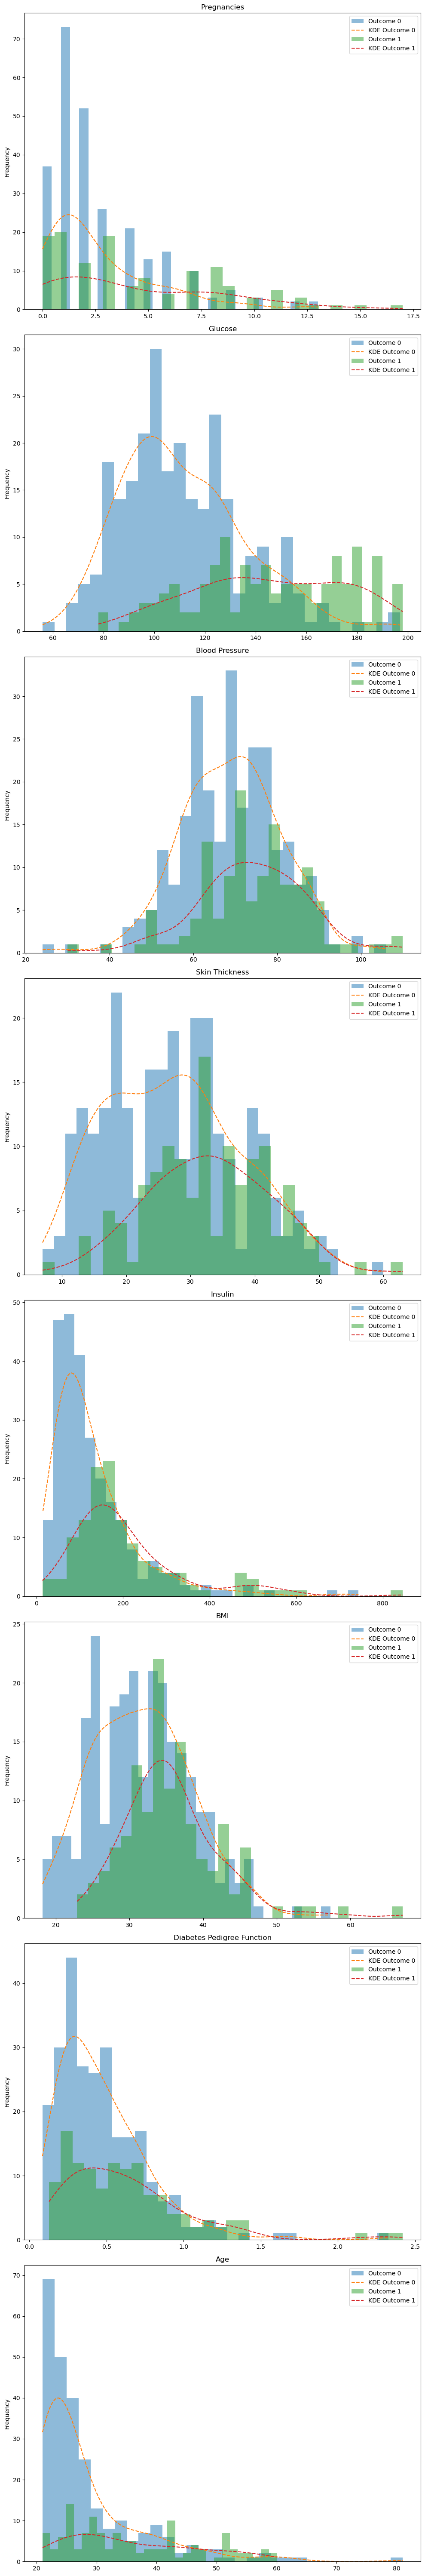

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

features = df.columns.drop('Outcome')
outcomes = df['Outcome'].unique()

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 60))
axes = axes.flatten()

for idx, feature in enumerate(features):
    for outcome in outcomes:
        data = df[df['Outcome'] == outcome][feature]
        data.plot(
            kind='hist', 
            bins=30, 
            alpha=0.5, 
            ax=axes[idx], 
            label=f'Outcome {outcome}'
        )
        # Add KDE
        if len(data) > 1 and data.std() > 0:
            kde = gaussian_kde(data)
            x_vals = np.linspace(data.min(), data.max(), 200)
            axes[idx].plot(x_vals, kde(x_vals) * len(data) * (data.max() - data.min()) / 30, 
                           label=f'KDE Outcome {outcome}', linestyle='--')
    axes[idx].set_title(feature)
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, norm

features = df.columns.drop('Outcome')
outcomes = df['Outcome'].unique()

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 60))
axes = axes.flatten()

for idx, feature in enumerate(features):
    for outcome in outcomes:
        data = df[df['Outcome'] == outcome][feature]
        data.plot(
            kind='hist', 
            bins=30, 
            alpha=0.5, 
            ax=axes[idx], 
            label=f'Outcome {outcome}'
        )
        # Add KDE
        if len(data) > 1 and data.std() > 0:
            kde = gaussian_kde(data)
            x_vals = np.linspace(data.min(), data.max(), 200)
            axes[idx].plot(
                x_vals, 
                kde(x_vals) * len(data) * (data.max() - data.min()) / 30, 
                label=f'KDE Outcome {outcome}', linestyle='--'
            )
        # Add Normal PDF using class mean and std
        mean = stats_by_class.loc[outcome, (feature, 'mean')]
        std = stats_by_class.loc[outcome, (feature, 'std')]
        if std > 0:
            pdf_x = np.linspace(data.min(), data.max(), 200)
            pdf_y = norm.pdf(pdf_x, mean, std)
            scale = len(data) * (data.max() - data.min()) / 30
            axes[idx].plot(
                pdf_x, 
                pdf_y * scale, 
                label=f'Normal PDF Outcome {outcome}', linestyle=':'
            )
    axes[idx].set_title(feature)
    axes[idx].legend()

plt.tight_layout()
plt.show()